# Task 04 – Sentiment Analysis on Social Text


C:\Users\kurab\AppData\Local\Temp\ipykernel_9600\653071228.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='coolwarm',


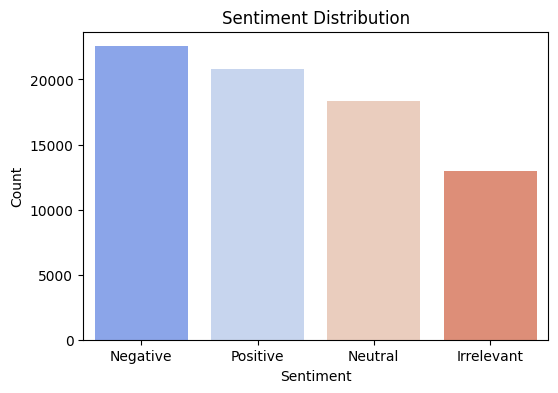

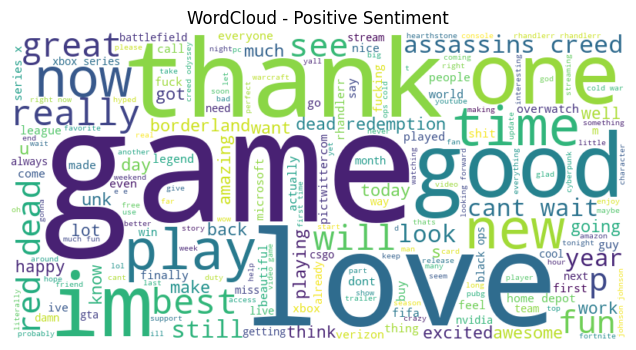

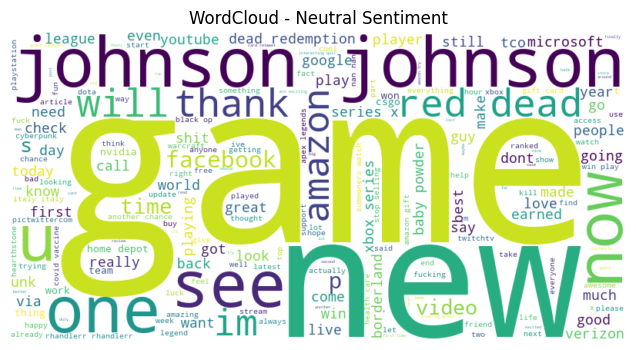

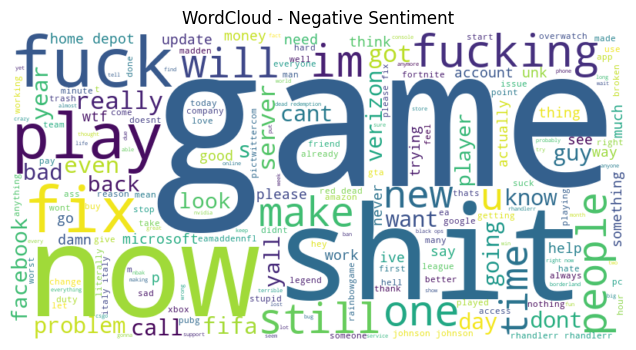

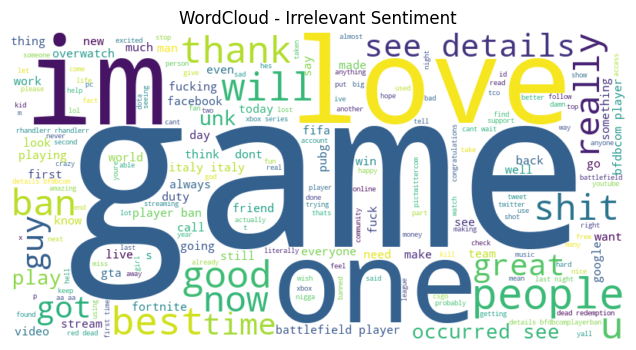

Processed dataset saved as processed_twitter_sentiment.csv


In [11]:
# Task-04: Sentiment Analysis & Visualization for twitter_training.csv

# 1. Install required libraries if needed
# pip install pandas matplotlib seaborn wordcloud

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

# 2. Load dataset (no headers in file)
df = pd.read_csv(r'C:\Users\kurab\OneDrive\Pictures\Documents\twitter_training.csv', header=None)
df.columns = ["ID", "Entity", "Sentiment", "Tweet"]

# 3. Basic text cleaning
def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)  # remove mentions & hashtags
    text = re.sub(r'[^a-z\s]', '', text)  # keep only letters
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

df["Clean_Tweet"] = df["Tweet"].apply(clean_text)

# 4. Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, palette='coolwarm',
              order=df['Sentiment'].value_counts().index)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 5. WordCloud for each sentiment
for sentiment in df['Sentiment'].unique():
    text = " ".join(tweet for tweet in df[df.Sentiment == sentiment]["Clean_Tweet"])
    if text.strip():  # avoid empty cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(8,4))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"WordCloud - {sentiment} Sentiment")
        plt.show()

# 6. Save cleaned dataset
df.to_csv("processed_twitter_sentiment.csv", index=False)
print("Processed dataset saved as processed_twitter_sentiment.csv")
